The goal of this week's exercise is to train a convolutional neural network to find out if someone is wearing glasses or not.

Like last week, we start by importing the libraried we need. We are again using tensorflow, but we now also use Keras, which is programmed on top of tensorflow and allows us to use fewer lines of code.

We also use IPython to show images and numpy to do basic math.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

from IPython.display import Image


## LOADING THE DATA

Here you can upload your "Data_Challenge.zip" dataset that contains examples of people with and without glasses. The neural network will use these examples to distinguish between the images with glasses and without. Uploading the dataset may take a while.

Sometimes you will have to follow some instructions to run the code, these will always appear in green and preceded by a #.

In [ ]:
# Upload your dataset here by clicking "Choose Files" after running the code. 
# It should be in .zip format and always named "Data_Challenge.zip" (you may need to change the name of the file)

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

This step decompresses your file so the actual images are stored in the cloud. You will see all of the image names appearing in the output.

In [ ]:
!unzip "Data_Challenge.zip"

unzip:  cannot find or open Data_Challenge.zip, Data_Challenge.zip.zip or Data_Challenge.zip.ZIP.


This step loads your training data. Note that the code is *inferring* the labels from your folders, and that the image size is 250*250 pixels.

In [ ]:
ds_training = keras.utils.image_dataset_from_directory(
    directory='Data_Challenge/training/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(250, 250))

Found 490 files belonging to 2 classes.


And this step is loading your validation data, so the algorithm can validate how good it is a guessing images that it has never seen before (not trained on them).

In [ ]:
ds_validation = keras.utils.image_dataset_from_directory(
    directory='Data_Challenge/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(250, 250))

Found 60 files belonging to 2 classes.


## DEFINING AND TRAINING THE MODEL

Here you can choose between 2 machine learning model. 

**OPTION 1** is a simpler model, but it allows you to see (and change) all of the layers of the convolutional neural network. The lines that have the Conv2D part correspond to the convolutional layers.

**OPTION 2** is the inception model, which will typically perform better, but does not let you see exactly how it is built.
https://en.wikipedia.org/wiki/Inceptionv3

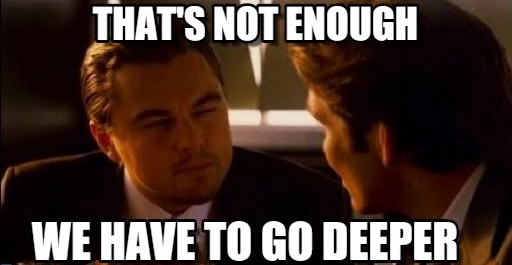

In [ ]:
# OPTION 1: Run this code to use a custom model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))  # In in this case we are only predicting is someone is wearing glasses or not, you can change this number if you have more categories.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

In [ ]:
# OPTION 2: Run this cell to use the inception model

model = keras.applications.InceptionV3(
    weights=None, input_shape=(250, 250, 3), classes=2) # In in this case we are only predicting is someone is wearing glasses or not, you can change this number if you have more categories.

This bit of code saves the model after each epoch, so we can use the best performing one at the end. Because models sometimes overfit to the training set (they only learn from the examples given and do not generalize well to new ones), the last epoch is not always the best one.

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

This part trains the model, exciting!

In the outputs you will be able to see the accuracy and the val_accuracy for each epoch.

The accuracy tells you the percentage of images in the **training** set that the algorithm guessed correctly.

The val_accuracy tells you the percentage of images in the **validation** set that the algorithm guessed correctly.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#You can change the number of epochs here, the default is 20

history = model.fit(ds_training, epochs=20, validation_data= ds_validation, 
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
16/16 [==============================] - 39s 1s/step - loss: 1.1142 - accuracy: 0.5837 - val_loss: 9.0554 - val_accuracy: 0.6667
Epoch 2/20
16/16 [==============================] - 11s 690ms/step - loss: 0.6763 - accuracy: 0.6408 - val_loss: 0.6711 - val_accuracy: 0.6500
Epoch 3/20
16/16 [==============================] - 11s 690ms/step - loss: 0.6489 - accuracy: 0.6531 - val_loss: 0.6680 - val_accuracy: 0.6333
Epoch 4/20
16/16 [==============================] - 11s 687ms/step - loss: 0.6224 - accuracy: 0.6551 - val_loss: 0.9484 - val_accuracy: 0.3333
Epoch 5/20
16/16 [==============================] - 11s 686ms/step - loss: 0.6005 - accuracy: 0.6980 - val_loss: 0.6780 - val_accuracy: 0.5500
Epoch 6/20
16/16 [==============================] - 11s 689ms/step - loss: 0.5547 - accuracy: 0.7408 - val_loss: 0.8792 - val_accuracy: 0.5000
Epoch 7/20
16/16 [==============================] - 11s 687ms/step - loss: 0.6028 - accuracy: 0.7204 - val_loss: 1.0813 - val_accuracy: 0.4167
Ep

This bit lets you vizualize how the accuracy improved with each epoch. Sometimes you can also see that improving the training accuracy does not always improve the validation accuracy (overfitting).

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

NameError: ignored

Now we can load and use the best performing model (lowest val_loss, highest val_accuracy)

In [ ]:
model.load_weights(checkpoint_filepath)

## PREDICTING A NEW IMAGE

To really see how good our model is, let's try using it on a new image. You can upload a new image file here.

In [ ]:
#Upload your selfie here by clicking the "Choose files" button

uploaded = files.upload()

Saving Ari_Fleischer_0012.jpg to Ari_Fleischer_0012.jpg


To make sure that the correct image is used for prediction, type your image name here, between the quotation marks.

In [ ]:
# Change the image name to match the image you just uploaded

image_name = "Ari_Fleischer_0012.jpg"

Here is your image, resized to meet the 250*250 pixel dimensions of the model.

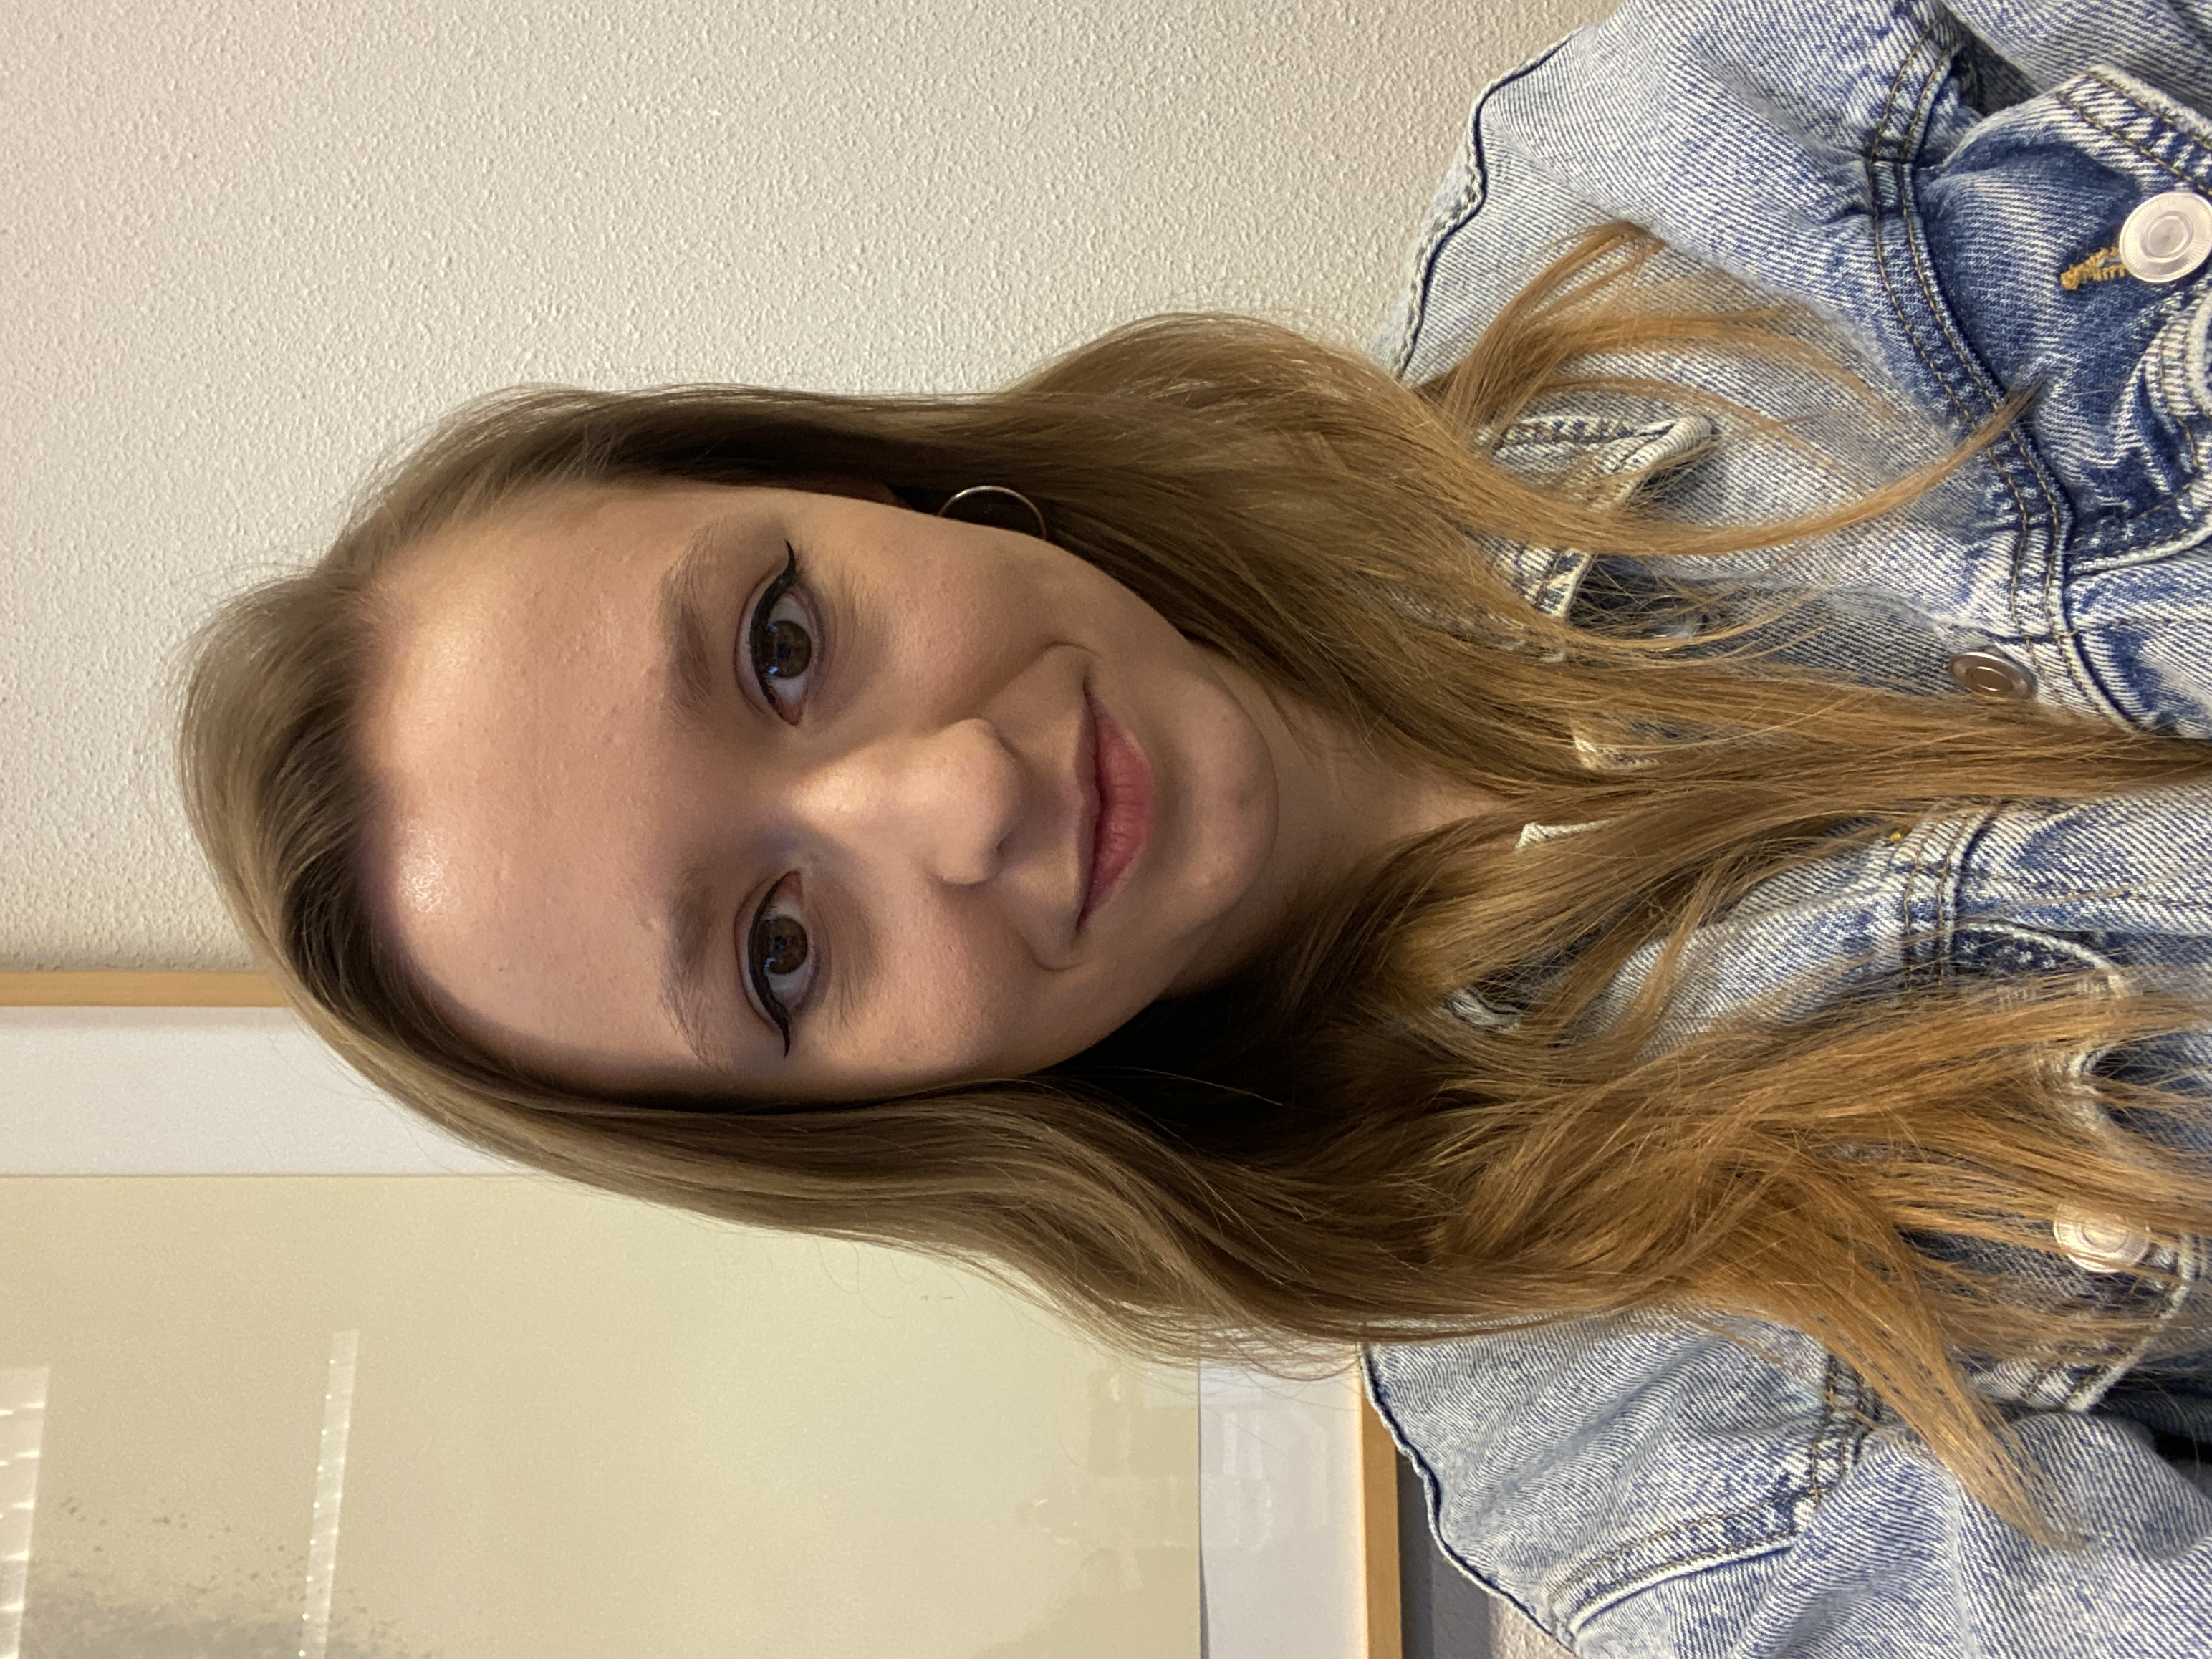

In [ ]:
Image(image_name, width=250, height=250)

This bit loads the image and converts it into numbers (RGB values) so it can be read by our machine learning model.

In [ ]:
selfie = image.load_img(
    image_name, target_size=(250,250))

selfie = image.img_to_array(selfie)
selfie = np.expand_dims(selfie, axis=0)

Finally, this is the bit where the probability that the image contains glasses is presented. Most of the code here is actually for formatting the output correctly.

In [ ]:
prediction = model.predict(selfie)

print("Probability that the image contains glasses: " + str("{:1.2f}".format(float(prediction[0][0])*100)) + " %")

Probability that the image contains glasses: 99.99 %
